In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.random.randint(5, size=(6, 4))

print(x)

[[4 3 1 0]
 [1 1 4 0]
 [0 1 2 3]
 [2 2 3 1]
 [3 0 4 4]
 [2 0 0 2]]


In [3]:
index = np.arange(0,9)
print(x.flatten()[index])

[4 3 1 0 1 1 4 0 0]


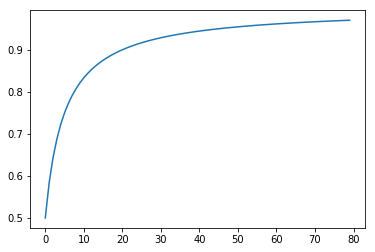

In [399]:
e = 0
e_rec = []
A = 2
B = 4
counter=0
for iteration in np.arange(0,80):
    e = 0.5*(iteration)/(iteration+5)+0.5
    e_rec= np.append(e_rec,e)
plt.plot(e_rec)

In [401]:
e_rec[-1]

0.9622641509433962

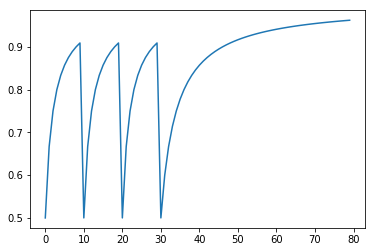

In [400]:
e = 0
e_rec = []
A = 2
B = 4
counter=0
for iteration in np.arange(0,80):
    if(iteration<=30):
        counter = iteration%10
        e = 0.5*counter/(counter+A)+0.5
    else:
        e = 0.5*(iteration-30)/(iteration-30+B)+0.5
    e_rec= np.append(e_rec,e)
plt.plot(e_rec)

# e = 0
# lr = 1e-4
# lr_rec = []
# e_rec = []
# A = 1.1
# counter=0
# for iteration in np.arange(0,50):
#     counter = iteration%13
#     e = 0.5*counter/(counter+A)+0.5
#     e_rec= np.append(e_rec,e)
#     if(iteration%10==0):
#         lr = lr/3
#         lr_rec= np.append(lr_rec,lr)

# plt.plot(e_rec)


In [72]:
e_rec[-3:-1]

array([0.96078431, 0.96153846])

In [66]:
e_rec[-1]

0.9622641509433962

In [342]:

var = np.arange(0,1,0.1)
y = [1/(1+np.exp(20*(x-0.3))) for x in var]

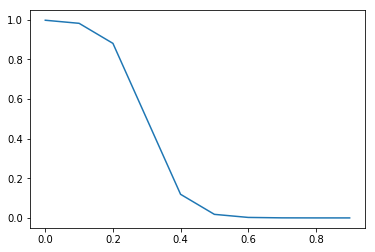

In [343]:
plt.plot(var,y)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

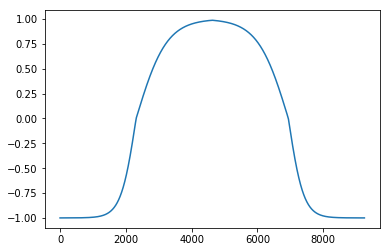

In [396]:
#FIRST REWARD AS A FUNCTION OF DRIFT OF BMEAN FROM BOPT i.e. in terms of BDEV = |BMEAN-BOPT|/BMAX
def r1(bmean): 
#     bmean = np.mean(self.btrack)
    BMAX = 9250
    BOPT = 0.5*BMAX
    bdev = np.abs(BOPT - bmean)/BMAX
    # bdev ranges from bdev = (0,0.5) of BMAX
     
    # based on the sigmoid function
    p1_sharpness = 10
    n1_sharpness = 20
    shift1 = 0.5
    # r1(x) = 0.5 when x = 0.25. 
    # Therefore, shift = 0.5 to make sure that (2*x-shift) evaluates to zero at x = 0.25

    if(bdev<=0.25): 
        r_1 = 2*(1-(1 / (1 + np.exp(-p1_sharpness*(2*bdev-shift1)))))-1
    else: 
        r_1 = 2*(1-(1 / (1 + np.exp(-n1_sharpness*(2*bdev-shift1)))))-1
    # r1 ranges from -1 to 1
    return r_1

x = np.arange(0,9250)
y = [r1(i) for i in x]
plt.plot(x,y)

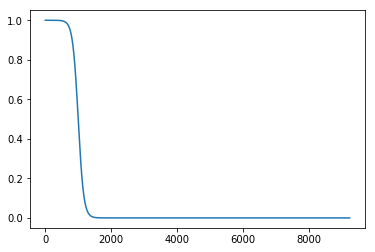

In [397]:
#SECOND REWARD AS A FUNCTION OF ENP AS LONG AS BMAX/4 <= batt <= 3*BMAX/4 i.e. bdev <= 0.25
def r2(enp):    # enp ranges from enp = (0,3) of DMAX
    DMAX = 500
    p2_sharpness = 2
    n2_sharpness = 2
    shift2 = 6    
    # r1(x) = 0.5 when x = 2. 
    # Therefore, shift = 6 to make sure that (3*x-shift) evaluates to zero at x = 2
#             print('Day energy', np.sum(self.eno.senergy[self.eno.day]))
#             print('Node energy', np.sum(self.atrack)*self.DMAX/self.N_ACTIONS)
#             x = np.abs(np.sum(self.eno.senergy[self.eno.day])-np.sum(self.atrack)*self.DMAX/self.N_ACTIONS )/self.DMAX
    x = np.abs(enp/DMAX)
    if(x<=2): 
        r_2 = (1 / (1 + np.exp(p2_sharpness*(3*x-shift2))))
 
    else: 
        r_2 = (1 / (1 + np.exp(n2_sharpness*(3*x-shift2))))
    return r_2

x = np.arange(0,9250)
y = [r2(i) for i in x]
plt.plot(x,y)

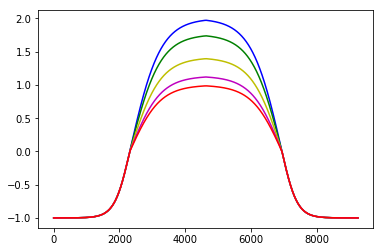

In [398]:
def r3(bmean, ENP): 
#     bmean = np.mean(self.btrack)
    r_2 = r2(ENP)
    BMAX = 9250
    BOPT = 0.5*BMAX
    bdev = np.abs(BOPT - bmean)/BMAX
    # based on the sigmoid function
    # bdev ranges from bdev = (0,0.5) of BMAX
    p1_sharpness = 10
    n1_sharpness = 20
    shift1 = 0.5
    # r1(x) = 0.5 when x = 0.25. 
    # Therefore, shift = 0.5 to make sure that (2*x-shift) evaluates to zero at x = 0.25

    if(bdev<=0.25): 
        r_1 = 2*(1-(1 / (1 + np.exp(-p1_sharpness*(2*bdev-shift1)))))-1
        r_1 = r_1*(2**r_2)
    else: 
        r_1 = 2*(1-(1 / (1 + np.exp(-n1_sharpness*(2*bdev-shift1)))))-1
    # r1 ranges from -1 to 1
    return r_1

DMAX = 500
x = np.arange(0,9250)
y1 = [r3(i,0.0*DMAX) for i in x]#b
y2 = [r3(i,1.75*DMAX) for i in x]#g
y3 = [r3(i,2.0*DMAX) for i in x]#y
y4 = [r3(i,2.25*DMAX) for i in x]#m
y5 = [r3(i,4.0*DMAX) for i in x]#r



plt.plot(x,y1,color='b')
plt.plot(x,y2,color='g')
plt.plot(x,y3,color='y')
plt.plot(x,y4,color='m')
plt.plot(x,y5,color='r')

In [11]:
import numpy as np

In [12]:
morning = np.arange(0,6)
night = np.arange(18,24)

In [13]:
index = np.concatenate((morning,night),axis=0)
print(index)

[ 0  1  2  3  4  5 18 19 20 21 22 23]


In [14]:
data = np.random.normal(size=24)
print(data)

[ 0.13271429 -0.88441169 -0.11316592 -1.09660627 -0.24112652  1.02387724
  1.01153671 -0.23273541 -2.20628587 -0.77187219 -0.41264906 -0.44052468
 -0.18132805 -1.50987645  0.30330748 -0.25832492 -1.04330647 -0.91105047
  0.6639866  -0.49047462 -0.33142859 -0.45764052  0.79483948  1.64778938]


In [15]:
data[index]

array([ 0.13271429, -0.88441169, -0.11316592, -1.09660627, -0.24112652,
        1.02387724,  0.6639866 , -0.49047462, -0.33142859, -0.45764052,
        0.79483948,  1.64778938])